In [56]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [106]:
size = 100
df = pd.DataFrame({'x':range(size)})
df['y'] = 3.5 * df.x + (np.random.normal(size=size)/10)
df.head()

,x,y
0,0,0.007712
1,1,3.482474
2,2,6.947995
3,3,10.556464
4,4,14.053765


In [107]:
with pm.Model() as model:    
    theta = pm.Normal('theta', mu=0, sd=1)
    a = pm.Normal('a', mu=0, sd=0.1)
    mu = pm.Deterministic('mu', a + theta * df.x)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    div = pm.Normal('div', mu=mu, sd=sigma, observed=df.y)
    trace = pm.sample(500, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, a, theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:05<00:00, 1078.64draws/s]
The acceptance probability does not match the target. It is 0.883294368920367, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c470b14e0>,
      dtype=object)

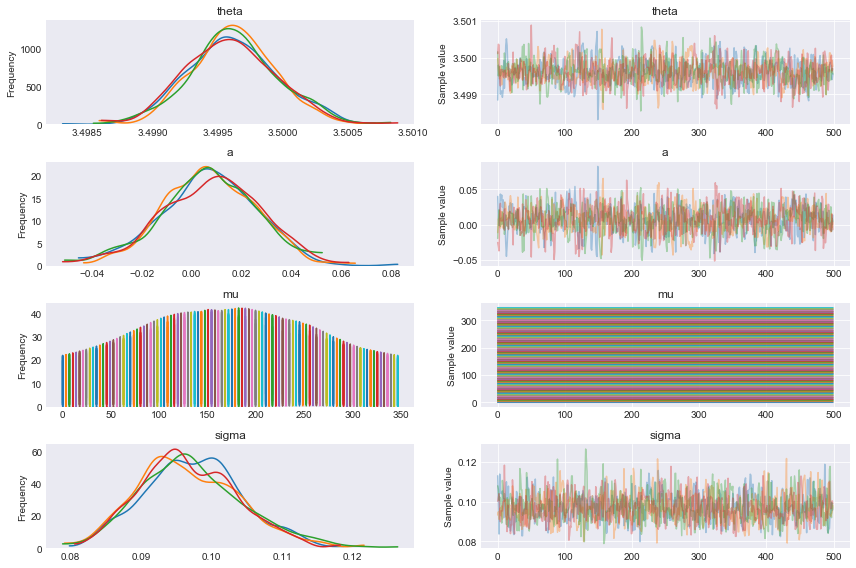

In [108]:
pm.traceplot(trace)

In [89]:
with pm.Model() as model_2:
    a = pm.Normal('a', mu=1, sd=1)
    bA = pm.Normal('bA', mu=1, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bA * df.x)
    Divorce = pm.Normal('Divorce', mu=mu, sd=sigma, observed=df.y)
    trace_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bA, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2089.58draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c4351f668>,
      dtype=object)

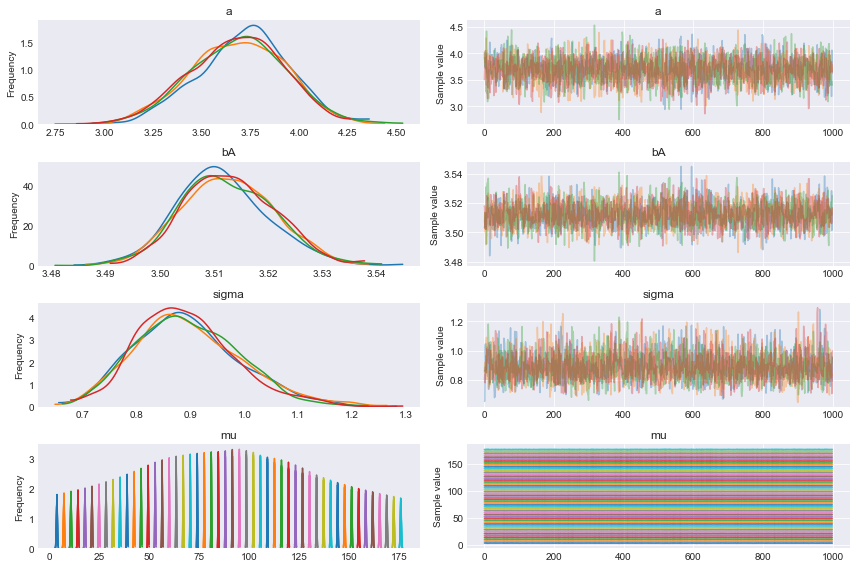

In [90]:
pm.traceplot(trace_2)

In [231]:
data = []
size = 3
data = np.zeros([size, 20], dtype=int)
x = []
y = []
n = []
pop = 5000

theta_ = -2.4
delta_ = 6

for i in range(size):
    for j in range(2, 21):
        x.append(j)
        y.append(np.random.binomial(p=((j + delta_)**theta_), n=pop))
        n.append(pop)
        
df = pd.DataFrame({'x': x, 'y': y, 'n':n})

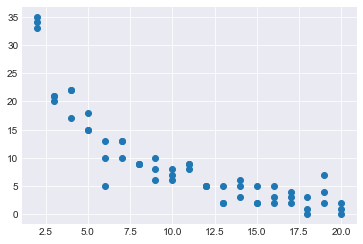

In [232]:
plt.scatter(x=df.x, y=df.y)

In [233]:
with pm.Model() as model_3:    
    theta = pm.Uniform('theta', lower=-5, upper=0)
    delta = pm.Uniform('delta', lower=0, upper=100)
    p = pm.Deterministic('p', (df.x.values + delta)**theta)
    div = pm.Binomial('div', p=p, observed=df.y, n=df.n)
    trace_3 = pm.sample(500, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [delta, theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3160.94draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c59ea7630>,
      dtype=object)

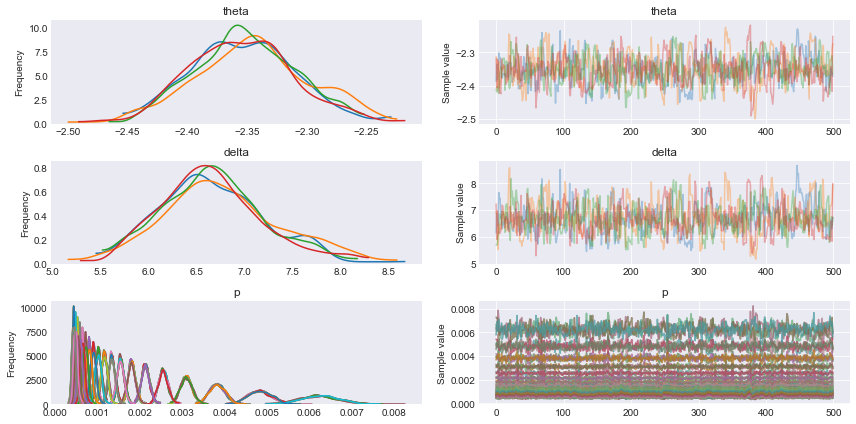

In [234]:
pm.traceplot(trace_3)

In [220]:
df.shape

(57, 3)